In [2]:
import os
import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc

In [3]:
def get_paths_labels(dir):
    file_paths = []
    labels = []
    cats = glob.glob(dir + '*/')
    c = 0
    for cat in cats:
        img_paths = glob.glob(cat + '*')
        file_paths += img_paths
        labels += [c for i in range(len(img_paths))]
        c += 1
    return file_paths, labels

In [8]:
def feature_vector(img):
    #color_features = img.flatten()
    grey_image = rgb2grey(img)
    hog_features = hog(grey_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    #flatten_features = np.hstack(color_features)
    return hog_features

In [9]:
def feature_matrix(img_paths):
    feature_vectors = []
    for img_path in img_paths:
        img = np.array(Image.open(img_path))
        img_vector = feature_vector(img)
        feature_vectors.append(img_vector)
    #feature_matrix = np.array(feature_vectors)
    return feature_vectors

In [10]:
file_paths, Y = get_paths_labels('./drive/My Drive/asl_dataset/')
matrix = feature_matrix(file_paths)

In [11]:
np.save('matrix.npy', matrix)

In [18]:
ss = StandardScaler()
matrix_ss = ss.fit_transform(matrix)
pca = PCA(n_components=500)
asl_pca = ss.fit_transform(matrix_ss)

In [20]:
X = pd.DataFrame(asl_pca)
y = pd.Series(Y)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    random_state=1234123)

In [21]:
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Text(0.5, 0, 'False Positive Rate')

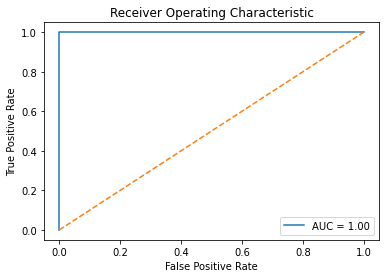

In [23]:
probabilities = svm.predict_proba(X_test)

y_proba = probabilities[:, 1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')